In [306]:
import pandas as pd 
import numpy as np 

## Machine Learning
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Importing data= Air Pollution

In [307]:
df=pd.read_excel(r'C:\Users\Srushti\Desktop\Machine Learning\Assignment\AirPollution.xls')
df

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer
...,...,...,...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09,Bhosari,2004-09-01,Monsoon
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14,Bhosari,2004-09-08,Monsoon
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64,Bhosari,2004-09-15,Monsoon
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95,Bhosari,2004-09-22,Monsoon


In [308]:
new=df.drop(['Site','Date','Season','Zn','Cd'],axis=1)
new

,PM10,Pb,Cu,Cr,NOx,SO2
0,120.71,2.67,0.53,0.61,84.17,40.37
1,140.25,3.49,0.10,0.91,88.81,39.48
2,107.01,1.31,0.19,0.48,81.49,48.29
3,88.81,0.76,0.33,0.39,61.80,27.42
4,75.05,0.60,0.41,1.54,48.71,19.23
...,...,...,...,...,...,...
146,40.13,0.10,0.04,0.09,18.88,10.09
147,40.38,0.10,0.03,0.09,47.56,24.14
148,31.28,0.11,0.02,0.05,31.53,26.64
149,52.10,0.48,0.04,0.06,42.08,22.95


In [309]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    151 non-null    float64
 1   Pb      151 non-null    float64
 2   Cu      151 non-null    float64
 3   Cr      151 non-null    float64
 4   NOx     151 non-null    float64
 5   SO2     151 non-null    float64
dtypes: float64(6)
memory usage: 7.2 KB


In [310]:
new.describe()

,PM10,Pb,Cu,Cr,NOx,SO2
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,68.536026,0.716358,0.331854,0.390066,42.692914,22.359868
std,40.908548,0.673069,0.408259,0.434575,23.101723,10.393498
min,16.240000,0.000000,0.000000,0.000000,8.260000,0.000000
25%,37.005000,0.220000,0.040000,0.085000,25.735000,15.165000
50%,59.610000,0.570000,0.130000,0.230000,37.000000,20.930000
75%,89.820000,0.965000,0.535000,0.580000,54.695000,27.420000
max,194.740000,3.490000,1.650000,3.220000,121.460000,53.270000


## Checking for Outliers

<AxesSubplot:>

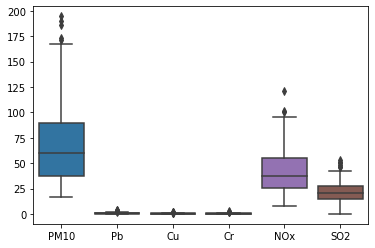

In [311]:
sns.boxplot(data=new)

## Removing Outliers

In [312]:
def remove_outlier(new):
    for i in new.columns :
        q1=new[i].quantile(0.25)
        q3=new[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        if ((new[i].dtype=='float64') | (new[i].dtype=='int64')): 
            new[i][new[i]>=upper_limit]=upper_limit
            new[i][new[i]<=lower_limit]=lower_limit
        else:
            new[i]=new[i]
    return new

remove_outlier(new)

,PM10,Pb,Cu,Cr,NOx,SO2
0,120.71,2.0825,0.53,0.6100,84.17,40.3700
1,140.25,2.0825,0.10,0.9100,88.81,39.4800
2,107.01,1.3100,0.19,0.4800,81.49,45.8025
3,88.81,0.7600,0.33,0.3900,61.80,27.4200
4,75.05,0.6000,0.41,1.3225,48.71,19.2300
...,...,...,...,...,...,...
146,40.13,0.1000,0.04,0.0900,18.88,10.0900
147,40.38,0.1000,0.03,0.0900,47.56,24.1400
148,31.28,0.1100,0.02,0.0500,31.53,26.6400
149,52.10,0.4800,0.04,0.0600,42.08,22.9500


<AxesSubplot:>

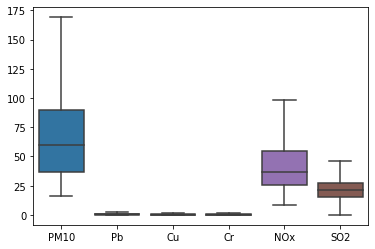

In [313]:
sns.boxplot(data=new)

## Checking for Missing values

In [314]:
new.isna().sum()

PM10    0
Pb      0
Cu      0
Cr      0
NOx     0
SO2     0
dtype: int64

There are no Missing values

## DATA PARTITION

In [315]:
x=new.drop('PM10',axis=1)
y=new.PM10
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=101)

## Train data

In [316]:
new1=pd.concat([y_train,x_train],axis=1)
new1

,PM10,Pb,Cu,Cr,NOx,SO2
119,32.44,0.18,0.05,0.01,16.68,5.98
13,31.31,0.47,0.07,0.10,29.84,16.27
74,55.74,0.72,0.19,0.32,61.72,23.51
68,91.89,0.99,0.09,0.51,79.11,38.29
34,21.21,0.14,0.10,0.00,31.62,17.52
...,...,...,...,...,...,...
63,141.11,1.39,0.53,0.71,80.72,34.31
70,39.27,0.66,0.10,0.22,23.93,20.16
81,57.36,0.92,0.89,0.55,63.66,27.13
11,46.80,0.65,0.07,0.22,63.22,35.12


## Finding Correlation and Collinearity

In [317]:
new1.corr()

,PM10,Pb,Cu,Cr,NOx,SO2
PM10,1.000000,0.859673,0.762416,0.881531,0.657616,0.659130
Pb,0.859673,1.000000,0.733743,0.816156,0.694778,0.640025
Cu,0.762416,0.733743,1.000000,0.846173,0.575879,0.560728
Cr,0.881531,0.816156,0.846173,1.000000,0.612259,0.615796
NOx,0.657616,0.694778,0.575879,0.612259,1.000000,0.885179
SO2,0.659130,0.640025,0.560728,0.615796,0.885179,1.000000


<AxesSubplot:>

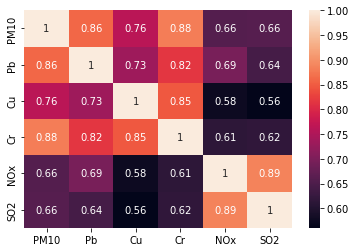

In [318]:
sns.heatmap(new1.corr(),annot=True)

* Their is Correlation of PM10 with Pb, Cu and Cr
* Multicollinearity exists as per the correlation matrix

## Model

In [319]:
new1.columns

Index(['PM10', 'Pb', 'Cu', 'Cr', 'NOx', 'SO2'], dtype='object')

In [320]:
import statsmodels.formula.api as smf
model = smf.ols('PM10 ~ Pb+Cr+Cu+NOx+SO2',data=new1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sat, 21 May 2022   Prob (F-statistic):           3.93e-38
Time:                        00:27:17   Log-Likelihood:                -435.63
No. Observations:                 105   AIC:                             883.3
Df Residuals:                      99   BIC:                             899.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0352      3.671      5.457      0.000      12.750      27.320
Pb            26.1331      5.149      5.075      0.000      15.916      36.350
Cr            56.2560      9.873      5.698      0.000      36.666      75.846
Cu            -1.1238      7.420     -0.151      0.880     -15.847      13.600
NOx           -0.0753      0.158     -0.478      0.634      -0.388       0.237
SO2            0.5031      0.321      1.568      0.120      -0.134       1.140
==============================================================================
Omnibus:                        2.339   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.311   Jarque-Bera (JB):                1.756
Skew:                           0.274   Prob(JB):                        0.416
Kurtosis:                       3.317   Cond. No.                         401.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Cu, SO2 and NOx has P>0.05. So model will be rebuilded by removing them.

In [321]:
import statsmodels.formula.api as smf
model1 = smf.ols('PM10 ~ Pb+Cr',data=new1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     259.9
Date:                Sat, 21 May 2022   Prob (F-statistic):           9.14e-41
Time:                        00:27:17   Log-Likelihood:                -437.75
No. Observations:                 105   AIC:                             881.5
Df Residuals:                     102   BIC:                             889.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.4367      2.375     10.709      0.000      20.725      30.148
Pb            28.1000      4.644      6.051      0.000      18.888      37.312
Cr            58.8852      7.584      7.764      0.000      43.841      73.929
==============================================================================
Omnibus:                        2.272   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.733
Skew:                           0.184   Prob(JB):                        0.420
Kurtosis:                       3.510   Cond. No.                         7.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [322]:
x1=new1.drop(['PM10','NOx','SO2','Cu'],axis=1)
series_before=pd.Series([variance_inflation_factor(x1.values,i)
                        for i in range(x1.shape[1])],
                       index=x1.columns)
series_before

Pb    5.937586
Cr    5.937586
dtype: float64

* There is Linear relationship between PM10 and Pb, Cr
* 83.6% is accuracy of model , so we can say model is good fit 
* Y = 25.4367+28.1*Pb+58.8852*Cr

## Assumptions of Model
* Linearity
* Constant Variance
* Normality
* Model Error has to be independently identificaly Distibuted

#### Linearity

<AxesSubplot:xlabel='Pb', ylabel='PM10'>

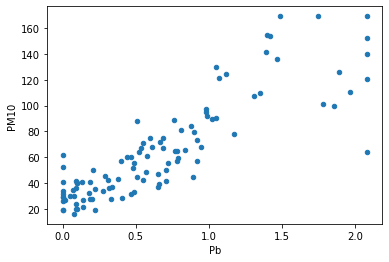

In [323]:
new1.plot.scatter(x='Pb',y='PM10')

Pb and Cr both shows strong positive linear relationship with PM10.

### Finding predicted values and error of PM10 using model1

In [324]:
new1['fitted_value']=model1.fittedvalues #Predicted Value
new1['residual']=model1.resid  #Error
new1.head(10)

,PM10,Pb,Cu,Cr,NOx,SO2,fitted_value,residual
119,32.44,0.18,0.05,0.0100,16.68,5.98,31.083596,1.356404
13,31.31,0.47,0.07,0.1000,29.84,16.27,44.532270,-13.222270
74,55.74,0.72,0.19,0.3200,61.72,23.51,64.512024,-8.772024
68,91.89,0.99,0.09,0.5100,79.11,38.29,83.287221,8.602779
34,21.21,0.14,0.10,0.0000,31.62,17.52,29.370743,-8.160743
112,50.11,0.21,0.00,0.0000,54.71,29.04,31.337744,18.772256
147,40.38,0.10,0.03,0.0900,47.56,24.14,33.546413,6.833587
23,65.89,0.84,0.74,0.4900,56.02,24.24,77.894514,-12.004514
102,94.90,0.98,0.81,0.9100,53.67,30.91,106.560311,-11.660311
4,75.05,0.60,0.41,1.3225,48.71,19.23,120.172463,-45.122463


#### Constant Variance

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

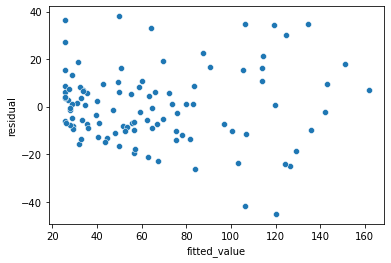

In [325]:
sns.scatterplot(x='fitted_value', y='residual',data=new1)

#### Normality

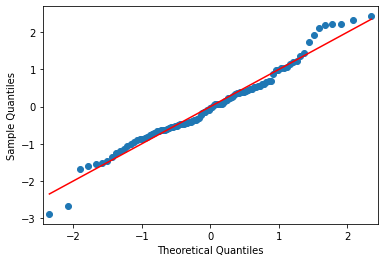

In [326]:
import statsmodels.api as sm
fig = sm.qqplot(new1['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

#### Model error has to be IID

<AxesSubplot:ylabel='Frequency'>

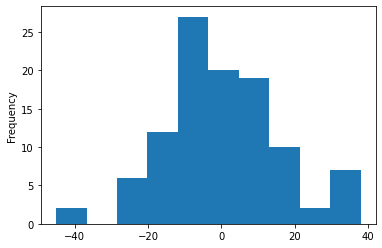

In [327]:
new1['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [328]:
new_test=pd.concat([x_test,y_test],axis=1)
new_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10
33,0.40,0.19,0.20,38.09,26.19,41.44
16,0.34,0.01,0.04,21.41,10.15,41.05
104,0.39,0.00,0.05,36.96,12.16,46.84
131,0.11,0.22,0.19,21.46,17.72,35.88
78,0.87,0.91,0.67,47.12,19.43,77.74


### Test data prediction

In [329]:
new_test['Prediction']=model1.predict(new_test) # predict = all row prediction ( Auto )
new_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10,Prediction
33,0.40,0.19,0.20,38.09,26.19,41.44,48.453792
16,0.34,0.01,0.04,21.41,10.15,41.05,37.346155
104,0.39,0.00,0.05,36.96,12.16,46.84,39.340008
131,0.11,0.22,0.19,21.46,17.72,35.88,39.715936
78,0.87,0.91,0.67,47.12,19.43,77.74,89.336855


In [330]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(new1['PM10'],new1['fitted_value'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE of train :",round(model_rmse,2))

RMSE of train : 15.64


In [331]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(new_test['PM10'],new_test['Prediction'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE of test :",round(model_rmse,2))

RMSE of test : 19.98
